In [1]:
from pathlib import Path

In [2]:
fruit_directory = Path('Fruit-Images-Dataset')

In [3]:
folders = [folder for folder in fruit_directory.iterdir() if folder.is_dir()]
folders

[WindowsPath('Fruit-Images-Dataset/Apple Red'),
 WindowsPath('Fruit-Images-Dataset/Banana'),
 WindowsPath('Fruit-Images-Dataset/Beetroot'),
 WindowsPath('Fruit-Images-Dataset/Cactus fruit')]

In [4]:
# create a dataset that contains the image path and the label is the folder name
import pandas as pd


C:\Users\301212298\AppData\Local\Temp\ipykernel_2428\2839296305.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
image_paths = []
labels = []
for folder in folders:
    for image in folder.iterdir():
        image_paths.append(str(image))
        labels.append(folder.name)

In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [7]:
import PIL
sample_image = image_paths[0]
sample_image_pil = PIL.Image.open(sample_image)
# get image size

In [8]:
input_shape_sizes = set()
for image in image_paths:
    image_pil = PIL.Image.open(image)
    input_shape_sizes.add(image_pil.size)

input_shape_sizes

{(100, 100)}

In [9]:
# replace the image path with the image pil
image_pils = [PIL.Image.open(image) for image in image_paths]

In [10]:
len(image_pils)

200

In [11]:
# convert X and y to numpy array
image_pils = np.array(image_pils)
labels = np.array(labels)

In [12]:
# convert the labels to integer
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [13]:
# split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_pils, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train[:50], X_train[50:]
y_valid, y_train = y_train[:50], y_train[50:]

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[100, 100, 3]),
    keras.layers.Dense(784, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
4/4 [==============================] - 1s 70ms/step - loss: 1.2548 - accuracy: 0.4000 - val_loss: 0.8652 - val_accuracy: 0.6800
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 0.8717 - accuracy: 0.6909 - val_loss: 0.5731 - val_accuracy: 0.7800
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.5911 - accuracy: 0.8636 - val_loss: 0.4938 - val_accuracy: 0.8000
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 0.4097 - accuracy: 0.9182 - val_loss: 0.2663 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.3392 - accuracy: 0.9636 - val_loss: 0.7090 - val_accuracy: 0.7200
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6853 - accuracy: 0.7000 - val_loss: 0.2055 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.2524 - accuracy: 0.9636 - val_loss: 0.2639 - val_accuracy: 0.9600
Epoch 8/50
4/4 [===========

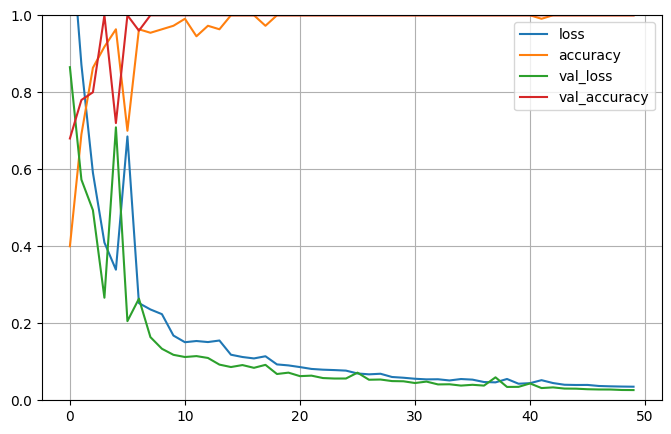

In [17]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [18]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0980 - accuracy: 0.9750


[0.09802691638469696, 0.9750000238418579]

In [19]:
# get a sample image
input_image = image_pils[103]
input_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

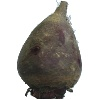

In [20]:
#convert numpy array to image
input_image_file = PIL.Image.fromarray(input_image)
input_image_file

In [21]:
# test the input image
# 0 is apple, 1 is banana, 2 is Beetroot, 3 is Cactus fruit
input_image_standardized = input_image / 255.0
input_image_standardized = input_image_standardized.reshape(1, 100, 100, 3)
model.predict(input_image_standardized)

1/1 [==============================] - 0s 82ms/step


array([[0.00098924, 0.01210112, 0.9831275 , 0.0037821 ]], dtype=float32)